In [1]:
from random import choices
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix 
import lightgbm as lgb

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [376]:
classf = pd.read_csv("dataFinal.csv")
classf

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,idRestaurant,date,Type,Plat,meteo,Event,idEtudiant,Heberg,Rev_par,Bourse,presenceP,presence
0,0,0,0,Esi016,01-09-2019,midi,Lentilles,Ensoleillé,Normal,17/0001,interne,56879,Oui,0.525,1
1,1,1,1,Esi016,01-09-2019,midi,Lentilles,Ensoleillé,Normal,17/0002,externe,19184,Oui,0.705,1
2,2,2,2,Esi016,01-09-2019,midi,Lentilles,Ensoleillé,Normal,17/0003,externe,56879,Oui,0.600,1
3,3,3,3,Esi016,01-09-2019,midi,Lentilles,Ensoleillé,Normal,17/0004,externe,19184,Oui,0.705,1
4,4,4,4,Esi016,01-09-2019,midi,Lentilles,Ensoleillé,Normal,17/0005,interne,139936,Non,0.410,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215995,215995,215995,215995,Esi016,15-08-2022,midi,Loubia,Ensoleillé,Normal,17/0196,interne,25251,Oui,0.650,1
215996,215996,215996,215996,Esi016,15-08-2022,midi,Loubia,Ensoleillé,Normal,17/0197,interne,19184,Oui,0.650,1
215997,215997,215997,215997,Esi016,15-08-2022,midi,Loubia,Ensoleillé,Normal,17/0198,interne,56879,Oui,0.545,0
215998,215998,215998,215998,Esi016,15-08-2022,midi,Loubia,Ensoleillé,Normal,17/0199,interne,56879,Oui,0.545,0


In [5]:
def ClasseRevenues(revenu):
    if(revenu<50000):
        return 1
    if(revenu>50000 and revenu<100000):
        return 2
    if (revenu>100000 and revenu<150000):
        return 3
    if (revenu>150000):
        return 4

In [6]:
for i in range(216000):
    classf["Rev_par"][i] =ClasseRevenues(classf["Rev_par"][i])

<ipython-input-6-dc636a85ec94>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classf["Rev_par"][i] =ClasseRevenues(classf["Rev_par"][i])


In [354]:
def decide(presP):
    if (presP>=0.6):
        return 1
    return 0

In [355]:
for i in range(216000):
    classf["presence"][i] = decide(classf["presenceP"][i])

<ipython-input-355-95bc0479b5f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classf["presence"][i] = decide(classf["presenceP"][i])


In [356]:
classf.to_csv("datasetFinal.csv")

In [401]:
Ytest

144001    1
144002    0
144003    1
144004    0
144005    1
         ..
215995    1
215996    1
215997    0
215998    0
215999    1
Name: presence, Length: 71999, dtype: int64

In [ ]:
def decide(presP):
    Type = [0,1]
    weight = [1-presP,presP]
    return choices(Type,weight)[0]

In [146]:
classf.drop(classf[classf.Event=="Weekend"].index, inplace=True)
classf.drop(classf[classf.Event=="Jour férié"].index, inplace=True)
classf.drop(classf[classf.Event=="Ramadan"].index, inplace=True)

In [203]:
classf.to_excel("DatasetFinal.xlsx")

In [225]:
data = pd.read_excel("DatasetFinal.xlsx")

In [319]:
classf

,Unnamed: 0,idRestaurant,date,Type,Plat,meteo,Event,idEtudiant,Heberg,Rev_par,Bourse,presenceP,presence
0,0,Esi016,01-09-2019,midi,Lentilles,Ensoleillé,Normal,17/0001,interne,56879,Oui,0.525,0
1,1,Esi016,01-09-2019,midi,Lentilles,Ensoleillé,Normal,17/0002,externe,19184,Oui,0.705,1
2,2,Esi016,01-09-2019,midi,Lentilles,Ensoleillé,Normal,17/0003,externe,56879,Oui,0.600,1
3,3,Esi016,01-09-2019,midi,Lentilles,Ensoleillé,Normal,17/0004,externe,19184,Oui,0.705,1
4,4,Esi016,01-09-2019,midi,Lentilles,Ensoleillé,Normal,17/0005,interne,139936,Non,0.410,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215995,215995,Esi016,15-08-2022,midi,Loubia,Ensoleillé,Normal,17/0196,interne,25251,Oui,0.650,1
215996,215996,Esi016,15-08-2022,midi,Loubia,Ensoleillé,Normal,17/0197,interne,19184,Oui,0.650,1
215997,215997,Esi016,15-08-2022,midi,Loubia,Ensoleillé,Normal,17/0198,interne,56879,Oui,0.545,0
215998,215998,Esi016,15-08-2022,midi,Loubia,Ensoleillé,Normal,17/0199,interne,56879,Oui,0.545,0


In [320]:
ListDate = classf['date']

In [321]:
ListDate

0         01-09-2019
1         01-09-2019
2         01-09-2019
3         01-09-2019
4         01-09-2019
             ...    
215995    15-08-2022
215996    15-08-2022
215997    15-08-2022
215998    15-08-2022
215999    15-08-2022
Name: date, Length: 216000, dtype: object

In [377]:
classf = classf.drop([ "Unnamed: 0","idRestaurant", "date", "Type" , "idEtudiant", "presenceP","Unnamed: 0.1","Unnamed: 0.1.1"],axis=1)

In [378]:
classf["Plat"].replace(["Lentilles","Loubia","Riz","Spaghetti","Couscous","Weekend"],[0,1,2,3,4,5],inplace=True)
classf["meteo"].replace(["Ensoleillé","Nuageux","Mauvais"],[0,1,2],inplace=True)
classf["Event"].replace(["Normal","Weekend", "Jour férié","Ramadan"],[0,1,2,3],inplace=True)
classf["Heberg"].replace(["interne","externe"],[0,1],inplace=True)
classf["Bourse"].replace(["Oui","Non"],[0,1],inplace=True)

In [379]:
trainC = classf[:14400]
testC = classf[144001:]

In [380]:
classf

,Plat,meteo,Event,Heberg,Rev_par,Bourse,presence
0,0,0,0,0,56879,0,1
1,0,0,0,1,19184,0,1
2,0,0,0,1,56879,0,1
3,0,0,0,1,19184,0,1
4,0,0,0,0,139936,1,0
...,...,...,...,...,...,...,...
215995,1,0,0,0,25251,0,1
215996,1,0,0,0,19184,0,1
215997,1,0,0,0,56879,0,0
215998,1,0,0,0,56879,0,0


In [381]:
Ytrain = trainC["presence"]

In [382]:
Xtrain = trainC.drop(["presence"], axis=1)

In [383]:
Ytest = testC["presence"]
Xtest = testC.drop(["presence"], axis=1)

In [384]:
Xtest

,Plat,meteo,Event,Heberg,Rev_par,Bourse
144001,5,0,0,1,19184,0
144002,5,0,0,1,56879,0
144003,5,0,0,1,19184,0
144004,5,0,0,0,139936,1
144005,5,0,0,1,25251,0
...,...,...,...,...,...,...
215995,1,0,0,0,25251,0
215996,1,0,0,0,19184,0
215997,1,0,0,0,56879,0
215998,1,0,0,0,56879,0


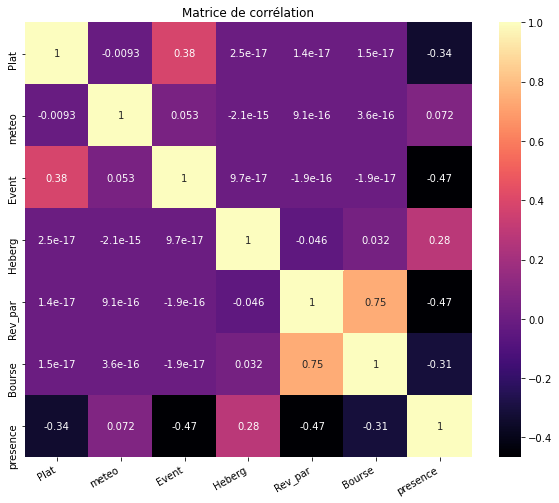

In [385]:
fig, axes = plt.subplots(figsize= (10,8))
sns.heatmap(trainC.corr(), annot=True, cmap='magma')
plt.xticks(rotation=30, ha='right')
plt.title("Matrice de corrélation")
plt.show()

In [386]:
trainC["presence"].value_counts()

1    8671
0    5729
Name: presence, dtype: int64

In [63]:
trainC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144000 entries, 0 to 143999
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   Plat      144000 non-null  int64
 1   meteo     144000 non-null  int64
 2   Event     144000 non-null  int64
 3   Heberg    144000 non-null  int64
 4   Rev_par   144000 non-null  int64
 5   Bourse    144000 non-null  int64
 6   presence  144000 non-null  int64
dtypes: int64(7)
memory usage: 7.7 MB


In [387]:
modele_rf = RandomForestClassifier(
     n_estimators=100,
     criterion='gini',
     max_depth=None,
     min_samples_split=2,
     min_samples_leaf=1,
     min_weight_fraction_leaf=0.0,
     max_features='auto',
     max_leaf_nodes=None,
     min_impurity_decrease=0.0,
     bootstrap=True,
     oob_score=False,
     n_jobs=None,
     random_state=None,
     verbose=0,
     warm_start=False,
     class_weight=None,
     ccp_alpha=0.0,
     max_samples=None,)

In [388]:
modele_rf.fit(Xtrain, Ytrain)

RandomForestClassifier()

In [389]:
pd.DataFrame(modele_rf.feature_importances_,
              index = Xtrain.columns, 
              columns = ["importance"]).sort_values(
     "importance", 
     ascending = False)

,importance
Rev_par,0.304968
Plat,0.271103
Event,0.209764
Heberg,0.117194
Bourse,0.054344
meteo,0.042627


In [390]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(f"Le pourcentage de bien classés est de : {accuracy_score(Ytest, modele_rf.predict(Xtest))*100} %")

Le pourcentage de bien classés est de : 97.44579785830358 %


In [391]:
pd.DataFrame(confusion_matrix(Ytest, modele_rf.predict(Xtest)),
             index = ["blanc_données", "rouge_données"],
             columns = ["blanc_predit", "rouge_predit"])

,blanc_predit,rouge_predit
blanc_données,32438,10
rouge_données,1829,37722


In [396]:
prevision = {
  "Date": ListDate[144001:],
  "Test": Ytest,
  "Prevision": modele_rf.predict(Xtest),
}
Prev = pd.DataFrame(prevision)

In [397]:
Prev

,Date,Test,Prevision
144001,21-08-2021,1,1
144002,21-08-2021,0,0
144003,21-08-2021,1,1
144004,21-08-2021,0,0
144005,21-08-2021,1,1
...,...,...,...
215995,15-08-2022,1,1
215996,15-08-2022,1,1
215997,15-08-2022,0,0
215998,15-08-2022,0,0


In [398]:
gb = Prev.groupby('Date').sum()

In [399]:
gb

,Test,Prevision
Date,,
01-01-2022,7,0
01-02-2022,156,153
01-03-2022,156,153
01-04-2022,7,0
01-05-2022,7,0
...,...,...
31-05-2022,108,105
31-07-2022,156,153
31-08-2021,108,105


<AxesSubplot:xlabel='Date'>

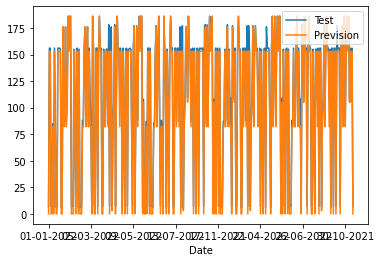

In [400]:
gb.plot()

In [142]:
 from sklearn.linear_model import LogisticRegression

In [76]:
trainCY = trainC["presence"]

In [75]:
trainCX = trainC.drop(["presence"], axis =1)

In [24]:
testCY = testC["presence"]
testCX = testC.drop(["presence","meteo","Heberg", "Bourse"], axis =1)

In [143]:
model = LogisticRegression()
model.fit(Xtrain,Ytrain)

LogisticRegression()

In [145]:
print('Score du modele =', model.score(Xtrain,Ytrain))

Score du modele = 0.9017383969339666


[[ 1121  2338]
 [ 3058 48016]]


<AxesSubplot:>

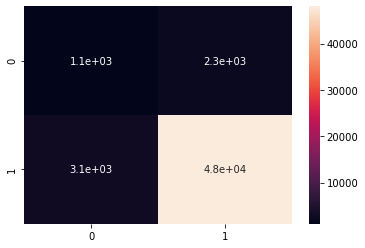

In [149]:
cm = confusion_matrix(model.predict(Xtest),Ytest)
print(cm)
sns.heatmap(cm, annot=True)

In [150]:
from sklearn.neighbors import KNeighborsClassifier

In [151]:
modelKnn = KNeighborsClassifier()

In [152]:
modelKnn.fit(Xtrain,Ytrain)

KNeighborsClassifier()

In [154]:
print('Score du modele =', modelKnn.score(Xtrain,Ytrain))

Score du modele = 1.0


[[ 4179     0]
 [    0 50354]]


<AxesSubplot:>

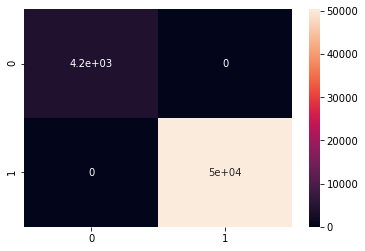

In [156]:
cm = confusion_matrix(modelKnn.predict(Xtest),Ytest)
print(cm)
sns.heatmap(cm, annot=True)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import InputLayer
import tensorflow as tf

In [30]:
from keras.models import Sequential
ANN_model = Sequential()

In [31]:
ANN_model.add(InputLayer(input_shape=(6, )))
# No hidden layers
ANN_model.add(Dense(1, activation='sigmoid'))

In [32]:
ANN_model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [33]:
ANN_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [34]:
history = ANN_model.fit(trainCX,trainCY, 
                        epochs=10, batch_size=32,
                        validation_split=0.2, 
                        shuffle=False)

Epoch 1/10
3600/3600 [==============================] - 32s 1ms/step - loss: 0.8422 - accuracy: 0.4656 - val_loss: 0.5141 - val_accuracy: 0.7715
Epoch 2/10
3600/3600 [==============================] - 4s 1ms/step - loss: 0.5780 - accuracy: 0.7186 - val_loss: 0.4347 - val_accuracy: 0.7662
Epoch 3/10
3600/3600 [==============================] - 5s 1ms/step - loss: 0.5360 - accuracy: 0.7194 - val_loss: 0.4164 - val_accuracy: 0.7660
Epoch 4/10
3600/3600 [==============================] - 5s 1ms/step - loss: 0.5200 - accuracy: 0.7206 - val_loss: 0.4101 - val_accuracy: 0.7680
Epoch 5/10
3600/3600 [==============================] - 4s 1ms/step - loss: 0.5138 - accuracy: 0.7209 - val_loss: 0.4077 - val_accuracy: 0.7680
Epoch 6/10
3600/3600 [==============================] - 4s 1ms/step - loss: 0.5114 - accuracy: 0.7211 - val_loss: 0.4068 - val_accuracy: 0.7680
Epoch 7/10
3600/3600 [==============================] - 4s 1ms/step - loss: 0.5105 - accuracy: 0.7209 - val_loss: 0.4065 - val_accuracy

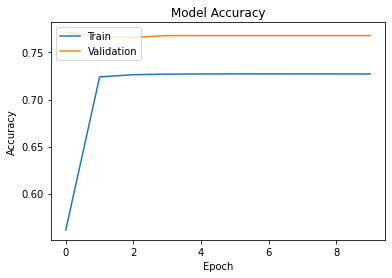

In [35]:
# Plot training and validation accuracy scores
# against the number of epochs.
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model Accuracy')
plt.legend(loc='upper left')

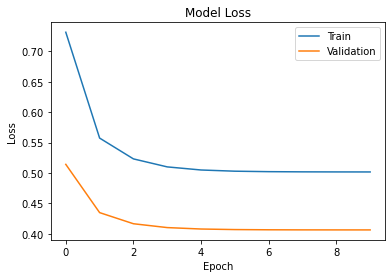

In [36]:
# Plot training and validation loss scores
# against the number of epochs.
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model Loss')
plt.legend(loc='upper right')

In [37]:
test_loss, test_acc = ANN_model.evaluate(testCX, testCY)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

2250/2250 [==============================] - 2s 995us/step - loss: 0.4833 - accuracy: 0.7348
Test loss: 0.48333001136779785
Test accuracy: 0.7348194718360901


C:\Users\Laghoub\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[37583  1777]
 [36529 68111]]


<AxesSubplot:>

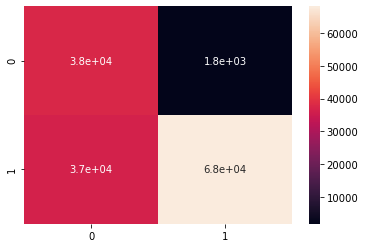

In [38]:
cm = confusion_matrix(ANN_model.predict_classes(trainCX),trainCY)
print(cm)
sns.heatmap(cm, annot=True)

In [39]:
result = ANN_model.predict_classes(testCX)

C:\Users\Laghoub\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [40]:
listTest = []
for i in testCY:
    listTest.append(i)

In [41]:
listreg = result.tolist()
listlog = []
for i in listreg:
    listlog.append(i[0])

In [132]:
res = {
    "date": classfile[144000:].date,
    "Test" : listTest,
  "pred" : listlog
}
respred = pd.DataFrame(res)

NameError: name 'classfile' is not defined

In [43]:
respred

,date,Test,pred
144000,21-08-2021,0,1
144001,21-08-2021,1,1
144002,21-08-2021,0,1
144003,21-08-2021,0,1
144004,21-08-2021,0,1
...,...,...,...
215995,15-08-2022,1,1
215996,15-08-2022,1,1
215997,15-08-2022,0,1
215998,15-08-2022,1,1


In [44]:
gb = respred.groupby('date').sum()

In [45]:
gb

,Test,pred
date,,
01-01-2022,0,0
01-02-2022,134,192
01-03-2022,123,192
01-04-2022,0,0
01-05-2022,0,0
...,...,...
31-05-2022,114,192
31-07-2022,117,192
31-08-2021,123,192


In [47]:
gb.to_excel('classification/resultLOG.xlsx')


In [48]:
readf = pd.read_excel("classification/resultLOG.xlsx")

In [51]:
readf= readf.drop(['date'], axis=1)

<AxesSubplot:>

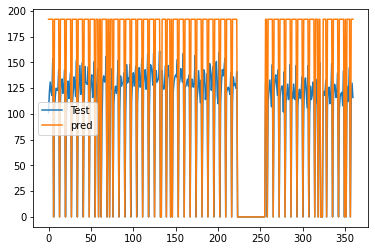

In [52]:
readf.plot()

In [53]:
from keras.models import Sequential

In [87]:
from keras import layers, Model, optimizers, regularizers
input = layers.Input(shape=(6,))
tmp = layers.Dense(200, activation='sigmoid')(input)
output = layers.Dense(2, activation='softmax')(tmp)
model = Model(input, output)
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 6)]               0         
_________________________________________________________________
dense_18 (Dense)             (None, 200)               1400      
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 402       
Total params: 1,802
Trainable params: 1,802
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [89]:
history = model.fit(trainCX,trainCY, 
                        epochs=10, batch_size=100,
                        )

Epoch 1/10


ValueError: in user code:

    C:\Users\Laghoub\anaconda3\lib\site-packages\keras\engine\training.py:830 train_function  *
        return step_function(self, iterator)
    C:\Users\Laghoub\anaconda3\lib\site-packages\keras\engine\training.py:813 run_step  *
        outputs = model.train_step(data)
    C:\Users\Laghoub\anaconda3\lib\site-packages\keras\engine\training.py:771 train_step  *
        loss = self.compiled_loss(
    C:\Users\Laghoub\anaconda3\lib\site-packages\keras\engine\compile_utils.py:201 __call__  *
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\Laghoub\anaconda3\lib\site-packages\keras\losses.py:142 __call__  *
        losses = call_fn(y_true, y_pred)
    C:\Users\Laghoub\anaconda3\lib\site-packages\keras\losses.py:246 call  *
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\Laghoub\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper  **
        return target(*args, **kwargs)
    C:\Users\Laghoub\anaconda3\lib\site-packages\keras\losses.py:1630 categorical_crossentropy
        return backend.categorical_crossentropy(
    C:\Users\Laghoub\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\Laghoub\anaconda3\lib\site-packages\keras\backend.py:4827 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\Laghoub\anaconda3\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (100, 1) and (100, 2) are incompatible


In [157]:
from sklearn.linear_model import LinearRegression

In [158]:
model_linRegMul = LinearRegression()

In [159]:
model_linRegMul.fit(Xtrain, Ytrain)

LinearRegression()

In [160]:
precision = model_linRegMul.score(Xtrain, Ytrain)
print(precision*100)

70.68654562094633


In [161]:
prediction = model_linRegMul.predict(Xtest)

In [162]:
ListDate[109067:]

144067    21-08-2021
144068    21-08-2021
144069    21-08-2021
144070    21-08-2021
144071    21-08-2021
             ...    
215995    15-08-2022
215996    15-08-2022
215997    15-08-2022
215998    15-08-2022
215999    15-08-2022
Name: date, Length: 54533, dtype: object

In [163]:
prevision2 = {
  "Date": ListDate[109067:],
  "Test": Ytest,
  "Prevision": model_linRegMul.predict(Xtest),
}
Prev2 = pd.DataFrame(prevision2)

In [164]:
Prev2

,Date,Test,Prevision
144067,21-08-2021,0.605,0.625436
144068,21-08-2021,0.605,0.625436
144069,21-08-2021,0.605,0.625436
144070,21-08-2021,0.425,0.520269
144071,21-08-2021,0.395,0.496108
...,...,...,...
215995,15-08-2022,0.650,0.630725
215996,15-08-2022,0.650,0.643173
215997,15-08-2022,0.545,0.565834
215998,15-08-2022,0.545,0.565834


In [165]:
gb2 = Prev2.groupby('Date').sum()

In [166]:
gb2

,Test,Prevision
Date,,
01-02-2022,133.69,136.385346
01-03-2022,127.69,129.928042
01-06-2022,115.69,121.524494
01-08-2022,127.69,125.416983
01-09-2021,115.69,121.524494
...,...,...
31-03-2022,147.69,126.035554
31-05-2022,119.69,123.470739
31-07-2022,123.69,127.363227


In [167]:
gb2.drop(gb2[gb2.Test==0].index, inplace=True)

In [168]:
gb2

,Test,Prevision
Date,,
01-02-2022,133.69,136.385346
01-03-2022,127.69,129.928042
01-06-2022,115.69,121.524494
01-08-2022,127.69,125.416983
01-09-2021,115.69,121.524494
...,...,...
31-03-2022,147.69,126.035554
31-05-2022,119.69,123.470739
31-07-2022,123.69,127.363227


In [169]:
gb2["Test"]= round(gb2["Test"])
gb2["Prevision"]= round(gb2["Prevision"])

In [170]:
gb2

,Test,Prevision
Date,,
01-02-2022,134.0,136.0
01-03-2022,128.0,130.0
01-06-2022,116.0,122.0
01-08-2022,128.0,125.0
01-09-2021,116.0,122.0
...,...,...
31-03-2022,148.0,126.0
31-05-2022,120.0,123.0
31-07-2022,124.0,127.0


<AxesSubplot:xlabel='Date'>

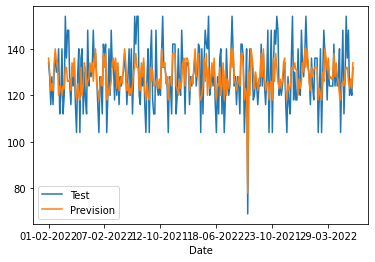

In [171]:
gb2.plot()

In [238]:
import random
random_numbers = [random.randint(0, 1) for x in range(20)]
print(random_numbers)

[0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0]


In [244]:
def Bruit(nb):
    if nb ==1:
        return 0
    else:
        return 1

In [246]:
print(Bruit(1))

0


In [370]:
for i in range(216000):
    if (i%30 == 0):
        classf["presence"][i] = Bruit(classf["presenceP"][i])

<ipython-input-370-d4ad897143b3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classf["presence"][i] = Bruit(classf["presenceP"][i])


In [375]:
classf.to_csv("dataFinal.csv")